In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [2]:
car_data = pd.read_csv("cars_data.csv")
car_data

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [3]:
car_data.describe(include='all')

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318.000000,2318,2318,2318.000000,2318.000000,2318.000000,2318,2318,2318,2318
unique,NaN,NaN,28,258,NaN,NaN,NaN,3,3,3,5
top,NaN,NaN,toyota,fit,NaN,NaN,NaN,at,2wd,rhd,gasoline
freq,NaN,NaN,1047,270,NaN,NaN,NaN,2171,2121,2301,2290
mean,1169.047023,971.522433,NaN,NaN,2005.972390,100013.194996,1507.010785,NaN,NaN,NaN,NaN
std,674.460724,288.673112,NaN,NaN,3.698863,52512.478883,549.585170,NaN,NaN,NaN,NaN
min,0.000000,80.000000,NaN,NaN,1979.000000,2000.000000,9.000000,NaN,NaN,NaN,NaN
25%,583.250000,776.000000,NaN,NaN,2004.000000,67000.000000,1300.000000,NaN,NaN,NaN,NaN
50%,1168.500000,1000.000000,NaN,NaN,2006.000000,94000.000000,1490.000000,NaN,NaN,NaN,NaN
75%,1753.750000,1213.000000,NaN,NaN,2009.000000,124000.000000,1800.000000,NaN,NaN,NaN,NaN


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [5]:
car_data.drop('id', axis = 1)

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [6]:
car_data.drop('model', axis = 1)

,id,price,mark,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,2000,170000,660,at,4wd,rhd,gasoline


In [7]:
car_data.isna().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

Text(0.5, 1.0, 'Car Price Distribution Plot')

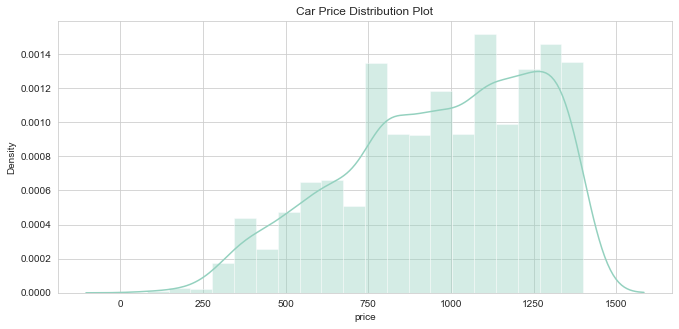

In [8]:
plt.figure(figsize=[11,5])
sns.distplot(car_data['price'])
plt.title('Car Price Distribution Plot')

Text(0.5, 1.0, 'Engine_Capacity Distribution Plot')

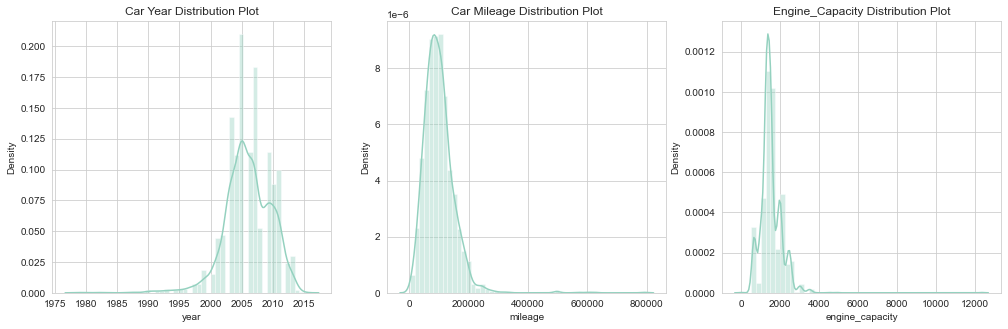

In [10]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(car_data['year'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(car_data['mileage'])
plt.title('Car Mileage Distribution Plot')

plt.subplot(1,3,3)
sns.distplot(car_data['engine_capacity'])
plt.title('Engine_Capacity Distribution Plot')

In [12]:
df = car_data.drop('id', axis=1)

In [13]:
df.describe()

,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,2005.972390,100013.194996,1507.010785
std,288.673112,3.698863,52512.478883,549.585170
min,80.000000,1979.000000,2000.000000,9.000000
25%,776.000000,2004.000000,67000.000000,1300.000000
50%,1000.000000,2006.000000,94000.000000,1490.000000
75%,1213.000000,2009.000000,124000.000000,1800.000000
max,1400.000000,2015.000000,790000.000000,12340.000000


Text(0.5, 1.0, 'Price and Engine_Capacity')

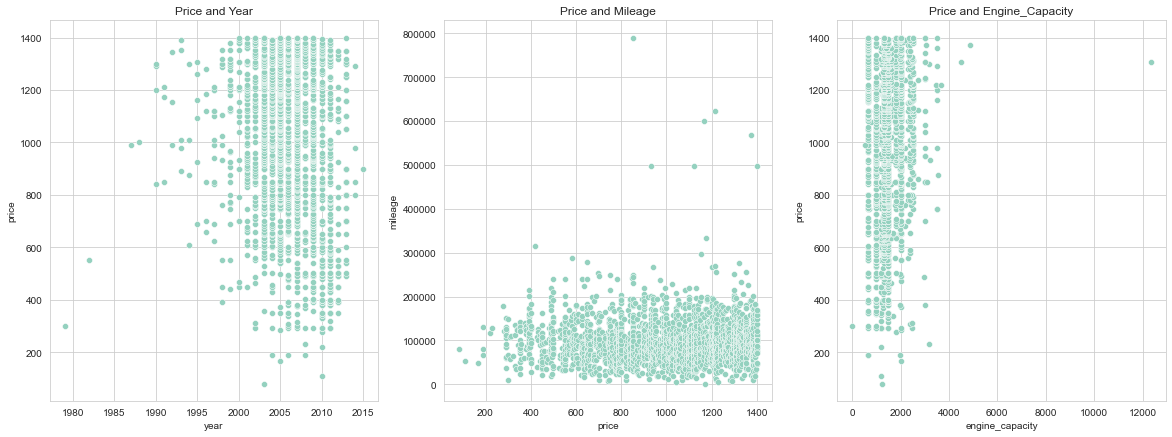

In [15]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='year',y='price',data=df)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(x='price',y='mileage',data=df)

plt.subplot(1,3,3)
sns.scatterplot(y='price',x='engine_capacity',data=df)
plt.title("Price and Engine_Capacity")

<AxesSubplot:xlabel='price', ylabel='Density'>

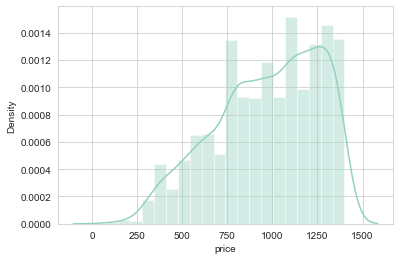

In [16]:
sns.distplot(df['price'])

In [17]:
log_price = np.log(df['price'])

# Then we add it to our data frame
df['log_price'] = log_price
df.head()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,log_price
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,4.382027
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,4.700480
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,5.105945
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,5.247024
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,5.247024


Text(0.5, 1.0, 'Log price and Engine_Capacity')

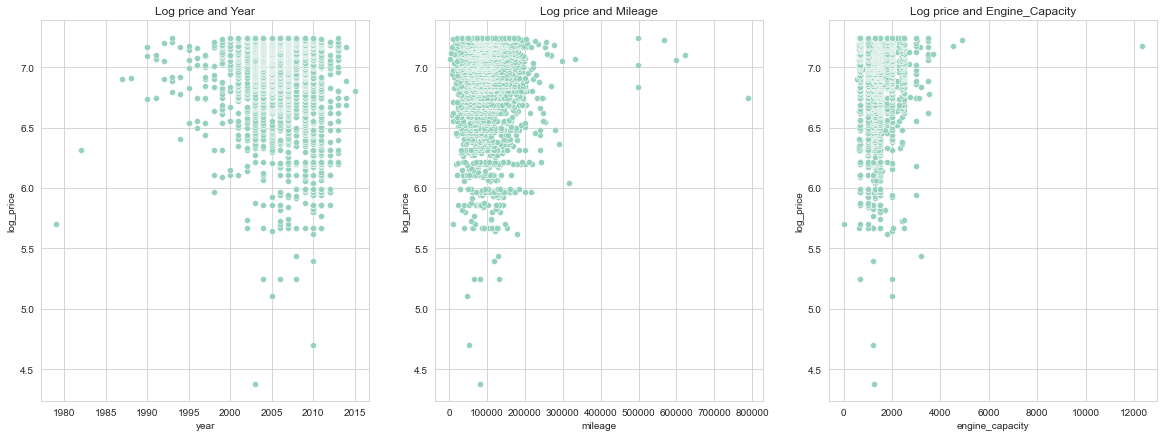

In [19]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Year")
sns.scatterplot(x='year',y='log_price',data=df)

plt.subplot(1,3,2)
plt.title("Log price and Mileage")
sns.scatterplot(y='log_price',x='mileage',data=df)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='engine_capacity',data=df)
plt.title("Log price and Engine_Capacity")


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['mileage','year','engine_capacity']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.711764,mileage
1,10.948744,year
2,8.656993,engine_capacity


In [23]:
df1 = df.drop('year',axis=1)

In [24]:
df1.head()

,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,log_price
0,80,nissan,march,80000,1240,at,2wd,rhd,gasoline,4.382027
1,110,nissan,march,53000,1200,at,2wd,rhd,gasoline,4.700480
2,165,nissan,lafesta,47690,2000,at,2wd,rhd,gasoline,5.105945
3,190,toyota,avensis,130661,1990,at,2wd,rhd,gasoline,5.247024
4,190,daihatsu,mira,66300,660,at,2wd,rhd,gasoline,5.247024


In [25]:
from sklearn.preprocessing import LabelEncoder
temp_data = df1.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

price              0.973394
engine_capacity    0.169317
mark               0.086405
drive              0.045208
transmission       0.043778
model              0.031921
hand_drive         0.020053
mileage            0.016678
fuel               0.008799
dtype: float64


<AxesSubplot:>

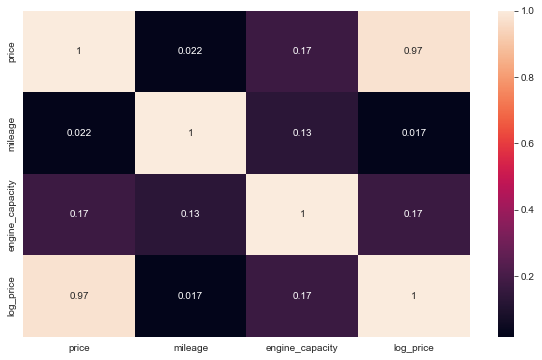

In [26]:
plt.figure(figsize=[10,6])
sns.heatmap(df1.corr(), annot=True)

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

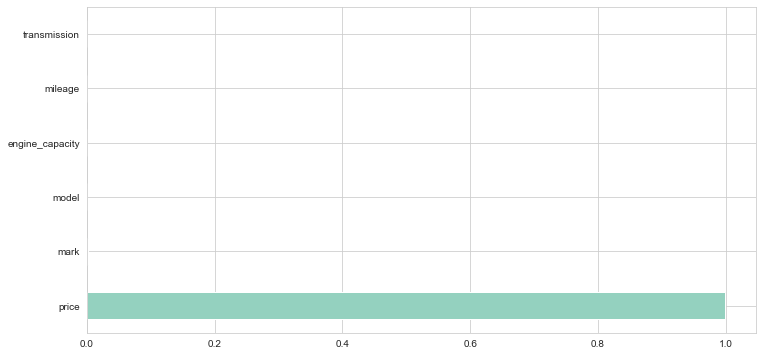

In [28]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [29]:
print(feat_importances.sort_values(ascending=False))

price              9.981549e-01
mark               1.387097e-03
model              1.822204e-04
engine_capacity    1.446881e-04
mileage            1.068168e-04
transmission       1.786631e-05
drive              5.415205e-06
hand_drive         8.793141e-07
fuel               1.564333e-07
dtype: float64


In [30]:
#Creating Dummie Variables
data_with_dummies = pd.get_dummies(df1,drop_first=True)

In [31]:
data_with_dummies.head()

,price,mileage,engine_capacity,log_price,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,mark_gm,...,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,80,80000,1240,4.382027,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,110,53000,1200,4.700480,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,165,47690,2000,5.105945,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,190,130661,1990,5.247024,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,190,66300,660,5.247024,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [32]:
#model development
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['mileage','engine_capacity']])


StandardScaler()

In [34]:
inputs_scaled = scaler.transform(x[['mileage','engine_capacity']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['mileage','engine_capacity'])

In [35]:
input_scaled2 =scaled_data.join(x.drop(['mileage','engine_capacity'],axis=1))

### Training and Testing Data

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

### Linear Regression Model

In [37]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9431118384853429
RMSE : 0.09048535828346788


### Random Forest Regressor Model

In [38]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9996060228969205
RMSE : 0.007530136560174331


### GBT Regressor Model

In [39]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9984451913223044
RMSE : 0.014959112866580021


In [40]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gbt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gbt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbt)))

MAE: 0.0018297697956487292
MSE: 0.00022377505775507997
RMSE: 0.014959112866580021


### let's manually check these predictions

In [43]:
df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.head()

,Predicted Price,Actual Price,Residual,Difference%
0,1319.92,1320.00,0.08,0.01
1,1120.33,1120.00,-0.33,0.03
2,1129.42,1130.00,0.58,0.05
3,1099.82,1100.00,0.18,0.02
4,925.08,924.00,-1.08,0.12
